## 딥러닝을 가능케한 autograd

In [2]:
import torch
x=torch.tensor([1.], requires_grad=True) # float 이여야해서 1.
print(x)

tensor([1.], requires_grad=True)


In [5]:
x=torch.tensor([1.])
print(x)
print(x.requires_grad)

x.requires_grad=True
print(x)
print(x.requires_grad)

tensor([1.])
False
tensor([1.], requires_grad=True)
True


In [7]:
x=torch.tensor([1.],requires_grad=True)
y=x**2
print(y) # PowBackward0 가 붙어있다!

print(x.grad)
y.backward()
print(x.grad) # y=x**2을 미분한 2x의 x 값에 1을 대입한 gradient 값

tensor([1.], grad_fn=<PowBackward0>)
None
tensor([2.])


In [12]:
x=torch.tensor([1.], requires_grad=True)
y=x**2
print(y)
y.retain_grad() # 이걸 하면 y.grad도 볼 수 있다.

z=3*y
print(z) # MulBackward0 가 붙어있다!

z.backward()
print(x.grad) # chain rule로 알아냄
print(y.grad) # warning! 중간건 안된다

tensor([1.], grad_fn=<PowBackward0>)
tensor([3.], grad_fn=<MulBackward0>)
tensor([6.])
tensor([3.])


In [13]:
x=torch.tensor([1.], requires_grad=True)
y=x**2
z=3*y

y.backward() # 이렇게하면 y에서부터 뒤로 넘어감 (backward)
print(x.grad)

tensor([2.])


In [14]:
x=torch.tensor([1.], requires_grad=True)
a=x**2
b=a+1
print(b) # AddBackward0 가 붙어있다!
c=b**2
c.backward()
print(x.grad)

tensor([2.], grad_fn=<AddBackward0>)


In [17]:
x=torch.tensor([1.],requires_grad=True)
y=torch.tensor([1.],requires_grad=True)
z=2*x**2 + y**2
print(z)
z.backward()
print(x.grad)
print(y.grad)

tensor([3.], grad_fn=<AddBackward0>)
tensor([4.])
tensor([2.])


In [15]:
x=torch.tensor([1.],requires_grad=True)
y=torch.tensor([1.],requires_grad=True)
z=y*x**2
z.backward()
print(x.grad)
print(y.grad)

tensor([2.])
tensor([1.])


In [18]:
x=torch.tensor([1.,2.,3.], requires_grad=True)
y=torch.sum(x**2) # x1**2 + x2**2 + x3**2
y.backward()

print(y)
print(x.grad) # 스칼라를 벡터로 미분

tensor(14., grad_fn=<SumBackward0>)
tensor([2., 4., 6.])


In [22]:
x=torch.tensor([2.],requires_grad=True)
x2=x.detach() # detach는 requires_grad=False 인 새로운 텐서를 만드는 것
print(x)
print(x2)
y=x**2
print(y)
y2=x2**2
print(y2)

tensor([2.], requires_grad=True)
tensor([2.])
tensor([4.], grad_fn=<PowBackward0>)
tensor([4.])


In [23]:
# detach 사용 용도
x=torch.tensor([1.], requires_grad=True)
y=x**2
z=y.detach() # x로 만든 것을 상수로 사용하고 싶은 것. y.requires_grad=False
w=y+z # x**2+1과 같다
w.backward()
print(x.grad)

tensor([2.])


In [28]:
# 많이 쓰이는 torch.no_grad
x=torch.tensor([1.], requires_grad=True)
# chain rule을 위해 계속 grad_fn을 update하니까 grad_fn 잠시 안계산하고 싶을 때 torch.no_grad
# 모델 테스트 시에는 불필요하게 메모리 쓸 필요 없기 때문!
with torch.no_grad():
  y=x**2
  print(x.requires_grad)
  print(y) # with 안에서 계산되는 애는 grad_fn이 안붙음
print(x.requires_grad)
# y.backward() # 에러가 발생한다
y=x**2
print(y)

x=torch.tensor([1.], requires_grad=True)
x.requires_grad=False
y=x**2
print(x.requires_grad)
print(y)
#y.backward() # 에러가 발생

True
tensor([1.])
True
tensor([1.], grad_fn=<PowBackward0>)
False
tensor([1.])


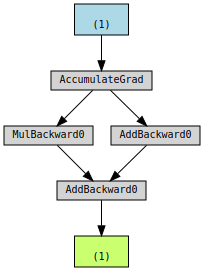

In [30]:
#!pip install torchviz
from torchviz import make_dot
x=torch.tensor([1.],requires_grad=True)
# make_dot(x)
# make_dot(x**2) # (1) 이라고 써있는 것은 shape를 나타냄
# make_dot(x**2+1)
# make_dot((x**2+1)**2)

y=2*x
z=3+x
r=y+z
make_dot(r)